In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("C:\\Users\\nagar\\HelloPython\\AnalyticalProjects\\AdvertisingAndSales\\Advertising.csv")

In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
print(df.isnull().sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [7]:
print(df.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


<Axes: xlabel='sales', ylabel='Count'>

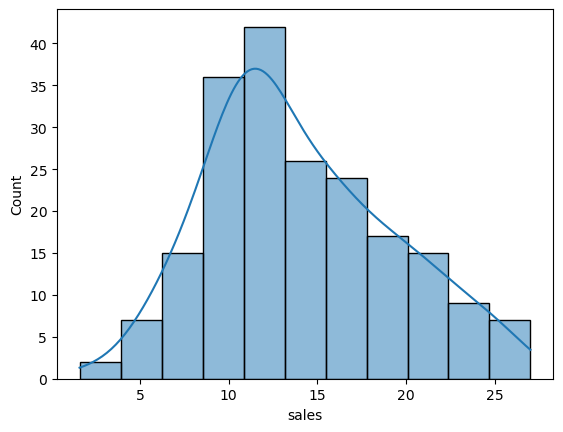

In [8]:
import seaborn as sns
sns.histplot(df['sales'],kde=True)

In [9]:
corr_matrix = df.corr()
print(corr_matrix)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


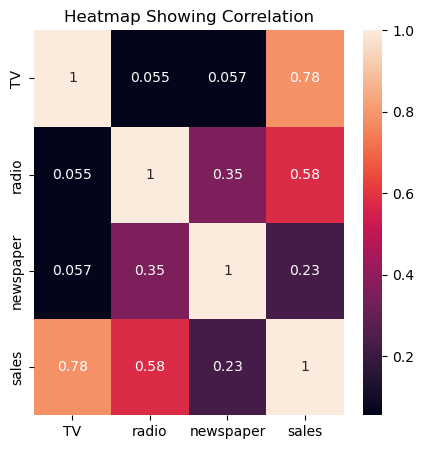

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Heatmap Showing Correlation")
plt.show()

In [11]:
df = df.drop_duplicates() 
df.shape

(200, 4)

In [12]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df[['TV','radio','newspaper']] = scaler.fit_transform(df[['TV','radio','newspaper']])

In [13]:
from sklearn.model_selection import train_test_split
X = df[['TV','radio']]
y = df[['sales']]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

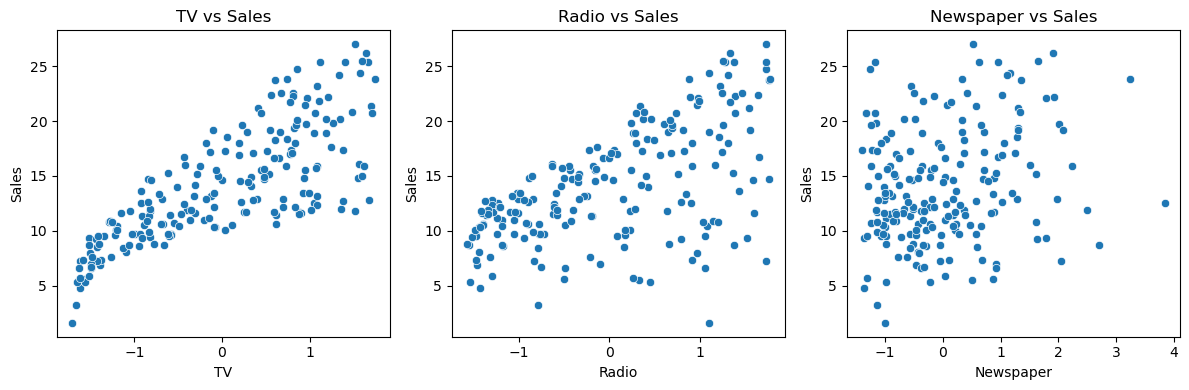

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for each feature vs sales
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['TV'], y=df['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['radio'], y=df['sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['newspaper'], y=df['sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 3.1379480090683525
Mean Absolute Error (MAE): 1.4443023138227573
R² Score: 0.9005833101920356


In [19]:
print(y_test.shape)
print(y_pred.shape)


(40, 1)
(40, 1)


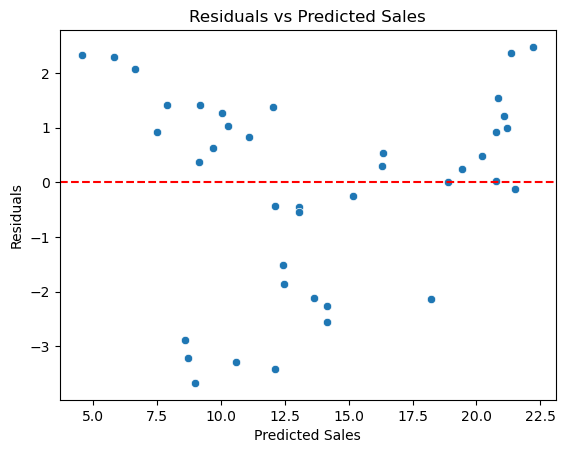

In [20]:
import numpy as np


y_test = np.ravel(y_test)  
y_pred = np.ravel(y_pred)  

residuals = y_test - y_pred

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.show()


In [21]:

#Multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X_vif = add_constant(df[['TV', 'radio', 'newspaper']])


vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


     feature       VIF
0      const  1.000000
1         TV  1.004611
2      radio  1.144952
3  newspaper  1.145187


In [31]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge MSE: {mse_ridge}")
print(f"Ridge MAE: {mae_ridge}")
print(f"Ridge R²: {r2_ridge}")


Ridge MSE: 0.061817152133197405
Ridge MAE: 0.19339743241266616
Ridge R²: 0.8922340772254839


In [36]:

y_pred_ridge = np.ravel(y_pred_ridge)  
y_test = np.ravel(y_test)  

residuals = y_test - y_pred_ridge

print("Shape of y_pred_ridge:", y_pred_ridge.shape)  
print("Shape of residuals:", residuals.shape)  

if y_pred_ridge.shape[0] == residuals.shape[0]:
    print("Shapes match! Proceeding with plotting...")
else:
    print("Shapes do not match. Debugging further...")


Shape of y_pred_ridge: (40,)
Shape of residuals: (40,)
Shapes match! Proceeding with plotting...


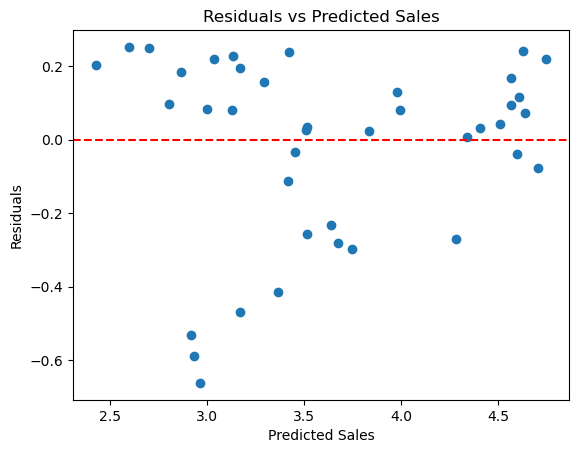

In [37]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_ridge, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.show()


In [32]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)  
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso MSE: {mse_lasso}")
print(f"Lasso MAE: {mae_lasso}")
print(f"Lasso R²: {r2_lasso}")


Lasso MSE: 0.0885450471075796
Lasso MAE: 0.22374278373759995
Lasso R²: 0.8456393026954578


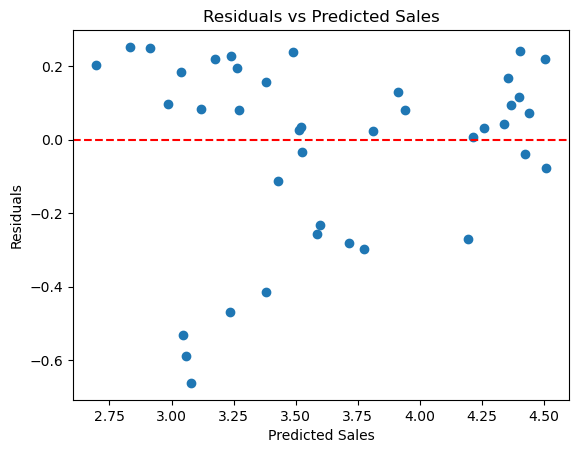

In [38]:
import matplotlib.pyplot as plt

# Scatter plot using matplotlib
plt.scatter(y_pred_lasso, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.show()


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

lr_model = LinearRegression()

cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')

print("Cross-Validation MSE for each fold: ", -cv_scores)
print("Average Cross-Validation MSE: ", -cv_scores.mean())


Cross-Validation MSE for each fold:  [0.05322328 0.0483292  0.02890639 0.16638375 0.04219395]
Average Cross-Validation MSE:  0.06780731296216168


In [42]:
from sklearn.model_selection import cross_val_score
ridge_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated Ridge MSE: ", -ridge_scores.mean())


Cross-validated Ridge MSE:  0.06781441285062109


In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso_model = Lasso(alpha=0.1)  
cv_scores_lasso = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE for Lasso Regression (per fold): ", -cv_scores_lasso)
print("Average Cross-Validation MSE for Lasso: ", -cv_scores_lasso.mean())


Cross-Validation MSE for Lasso Regression (per fold):  [0.06538126 0.07220562 0.0401005  0.20205102 0.05828805]
Average Cross-Validation MSE for Lasso:  0.0876052901802829


 Newspaper feature is not such important feature as it has 0.228299 correlation with sales.
The R2 score considering newspaper was 0.88 but was increased to 0.90 when newspaper was removed.
This could conclude that the expenditure on newspaper advertiseement can be reduced and can focus on other advertising techniques.
The dataframe has no multicolinearity as well as missing values.
The accuracy of Linear and ridge is good along with an excellent r2 score.
Also, heteroscedasticity is not present.
Ridge Regression did not provide a substantial improvement over Linear Regression, indicating no significant overfitting.
